# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/ives/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


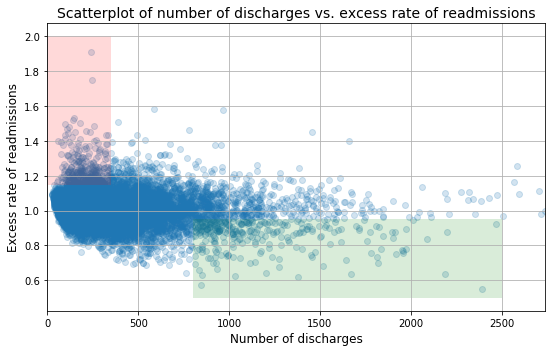

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [7]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


### A. Do you agree with the above analysis and recommendations? Why or why not?

According to the above graph, the first conclusion which indicates that there is a significant correlation between hospital capacity (number of discharges) and readmission rates may not be true. The varibility of the given data is quite large to say anything about the correlation between the two variables. Therefore, a proper statistical analysis of the correlation between the number of discharges and the readmission rates will need to conducted. 

The second conclusion, which stated that smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions could be misleading since statistical hypothesis test should not lead to any causation.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis
#### Linear Regression Analysis

In one of the initial observations based on the generated plot above, the previous analysis claimed that the rate of readmissions is trending down with increasing number of discharges. This fact could be misleading since the dataset is quite large with large variability. The outliers could also affect how the correlation between the rate of readmissions and the number of discharges. Hence, a linear regression analysis should be conducted to determine if there is indeed a negative correlation. 

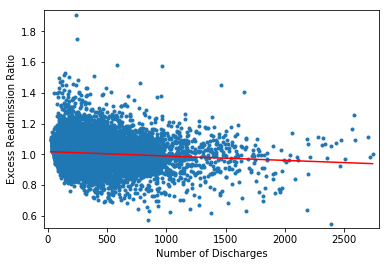

The slope of the linear regression line between the number of discharges (x) and the exess readmission rate is  -2.8565052943821946e-05 .The intercept is  1.0179475579544202 .


In [8]:
# Perform a linear regression using np.polyfit():
a, b = np.polyfit(x, y, 1)

x_fit=[min(x), max(x)]
y_fit = [a*x + b for x in x_fit]

# Plot both the original dataset and the regression line 
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
plt.margins(0.02)
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Excess Readmission Ratio')
_ = plt.plot(x_fit, y_fit, 'r')
plt.show()

print ('The slope of the linear regression line between the number of discharges (x) and the exess readmission \
rate is ', a, '.The intercept is ', b, '.')

The linear regression shows that there is indeed a negative slope between the number of discharges and the excess readmission rate (slope = -0.0000286). However, this number cannot be used to conclude the negative trend between these two variables due to the large variability of the dataset and the presence of outliers. The next step to confirm such a relationship is to conduct a full significance test with a null and an alternate hypothesis test. The signicant level is chosen to be alpha=0.1

#### Checking for the correlation between the number of discharges and the readmission rates

The null hypothesis is that there is no significant correlation (pro or p) between the number of discharges (hospital capacity) and the readmission rates. The alternate hypothesis would be that there is a significant correlation between the number of discharges (hospital capacity) and the readmission rates as stated from the previous study. 

H<sub>o</sub>: pro = 0

H<sub>a</sub>: pro != 0

The hypothesis test will be performed using two different methods: 
+ permutation replicates
+ frequentist statistical test

#### Step 1: Permuation Replication

In [25]:
def pearson_r(data1, data2):
    return np.corrcoef(data1, data2)[0,1]

r_obs = pearson_r(x, y)

size = 10000
#Initialize permutation replicates: 
perm_replicates = np.empty(size)

#Draw replicates
for i in range(size):
    #permuate the number of discharges:
    x_permuted = np.random.permutation(x)
    
    # compute pearson correlation:
    perm_replicates[i] = pearson_r(x_permuted, y)

#Compute upper and lower bound:
lower_bound = np.mean(perm_replicates) + r_obs 
upper_bound = np.mean(perm_replicates) - r_obs

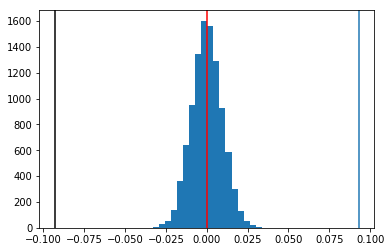

In [26]:
plt.hist(perm_replicates, bins=20)
plt.axvline(x=np.mean(perm_replicates), color='r')
plt.axvline(x=lower_bound, color='k')
plt.axvline(x=upper_bound)
plt.show()

In [27]:
# Compute p-value: p
p1 = np.sum(perm_replicates <= lower_bound)/len(perm_replicates)
p2 = np.sum(perm_replicates >= upper_bound)/len(perm_replicates)
p = p1+p2
print ('The p-value is', p)

The p-value is 0.0


Based on the permuation replication test, 10000 trials have correlation in between -0.03 to 0.03. The p-value for this test is very low in comparison to the observed correlation between the number of discharges and the excess readmission ratio. Based on a significance level of 0.01, this fact indicates that there is statistically significant evidence for us to reject the null hypothesis, which states that there is no correlation between the hospital capacity and the readmission rate. This means there is some correlations between the two variables and this correlation is low since the observed pro value is -0.09

####    Step 2: Frequentist Statistical Test

In [12]:
from scipy import stats
n = len(x)
t_stat = r_obs*np.sqrt((n-2)/(1-r_obs**2))
p_val = stats.t.sf(np.abs(t_stat), n-2)*2 #two-tailed test

if p_val < 0.01:
    print ('The null hypothesis is rejected. The p-value is ', p_val)
else:
    print ('We fail to reject the null hypothesis. The p-value is ', p_val)

The null hypothesis is rejected. The p-value is  1.5022756426614974e-23


Based on the t-test for the population correlation coefficient, the p-value is much smaller than the significance level alpha=0.01 for a left-tailed test. Therefore, we can reject the null hypothesis. 

### Additional 
+ Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
Based on my statistical analysis conducted by both permutation replication and frequentist test, the p-value is extremely small in comparison to the significance level alpha of 0.01. Because of this, we must reject the null hypothesis and conclude that there is no correlation between the hospitcal capacity and the excess readmission ratio. Hence, this will change the recommendation that we should provide to the client. In other words, hospitcals or facilities with small capacity should not need to demonstrate upgraded resource allocation for quality care. 
  
+ Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information Construct another plot that conveys the same information in a more direct manner.
The advantage of using the given scatter plot is that it helps to capture all the data points and therefore conveys the variability of the dataset. However, because of this variability, it would be very hard to identify whether there is a relationship between the two variables of interest. In addition, the given plot does not show the distribution for each variable, which is an important key to identify the trends within the variables before any analysis. 

#### Redraw Plot

/home/ives/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ives/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


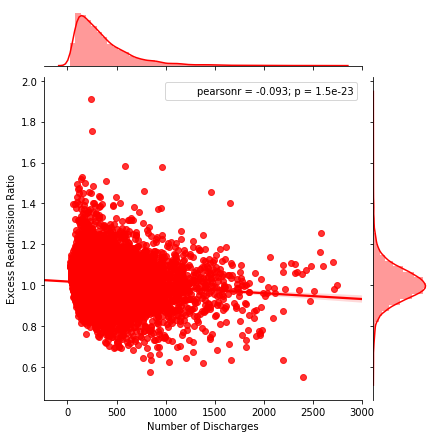

In [13]:
import seaborn as sns
sns.jointplot(np.array(x), np.array(y), kind='reg', color='r')
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.show()